### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?

![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [11]:
# -- ВАШ КОД ТУТ

import numpy as np
import pandas as pd

data = pd.read_csv('non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T


# Генерация данных до 8 степени
X = generate_degrees(data['x_train'], 8)
y = data['y_train']


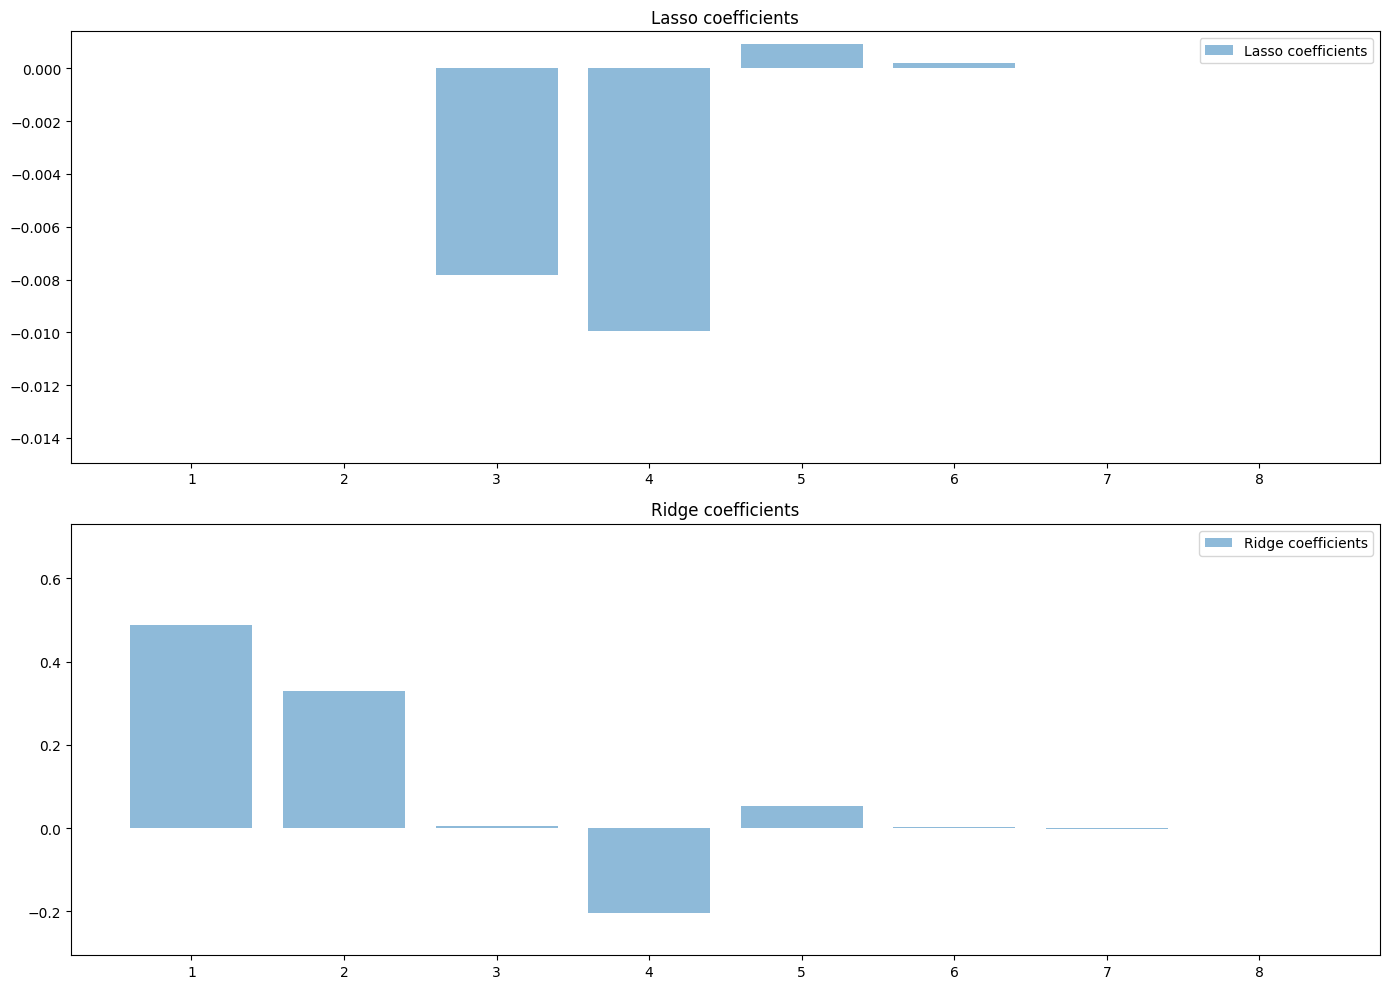

In [16]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение Lasso и Ridge
lasso = Lasso(alpha=0.8).fit(X_train, y_train)
ridge = Ridge(alpha=0.8).fit(X_train, y_train)

fig, axs = plt.subplots(2, figsize=(14, 10))

# Lasso
axs[0].bar(range(1, 9), lasso.coef_, alpha=0.5, label='Lasso coefficients')
axs[0].set_title('Lasso coefficients')
axs[0].legend()
axs[0].set_ylim([min(lasso.coef_)*1.5, max(lasso.coef_)*1.5])

# Ridge
axs[1].bar(range(1, 9), ridge.coef_, alpha=0.5, label='Ridge coefficients')
axs[1].set_title('Ridge coefficients')
axs[1].legend()
axs[1].set_ylim([min(ridge.coef_)*1.5, max(ridge.coef_)*1.5])

plt.tight_layout()
plt.show()
